# Solving Regression Problem Using ANN

In [64]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [65]:
os_chdir = ('/content/drive/MyDrive/Colab Notebooks/Regression Problem Solving')

In [66]:
os.getcwd()


'/content'

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
housing = fetch_california_housing()

In [69]:
housing.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [70]:
X = pd.DataFrame(housing.data, columns = housing.feature_names)

In [73]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [72]:
y = pd.DataFrame(housing.target, columns = ['target'])

In [74]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [75]:
X.shape

(20640, 8)

In [76]:
y.shape

(20640, 1)

In [77]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [78]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [79]:
X_train.shape[1]

8

In [80]:
X_train.shape[1:]

(8,)

#Defining the Layers Of an ANN


In [81]:
LAYERS = [
    tf.keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1)
]

In [82]:
model = tf.keras.models.Sequential(LAYERS)

In [83]:
LOSS = 'mse'
OPTIMIZER = 'SGD'

model.compile(optimizer = OPTIMIZER, loss = LOSS)

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [86]:
EPOCHS = 20

history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_valid,y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5945 - val_loss: 0.9653
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7266 - val_loss: 0.5128
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4155 - val_loss: 0.4497
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3754 - val_loss: 0.4339
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3596 - val_loss: 0.4312
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3512 - val_loss: 0.4195
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3450 - val_loss: 0.4194
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3396 - val_loss: 0.4272
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3362 - val_loss: 0.4124
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3323 - val_loss: 0.4155

In [87]:
pd.DataFrame(history.history)

,loss,val_loss
0,1.594477,0.965272
1,0.726563,0.512787
2,0.415499,0.449736
3,0.375380,0.433880
4,0.359559,0.431153
5,0.351189,0.419540
6,0.344973,0.419424
7,0.339648,0.427168
8,0.336151,0.412381
9,0.332256,0.415481


from matplotlib import pyplot as plt
_df_5['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='loss', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

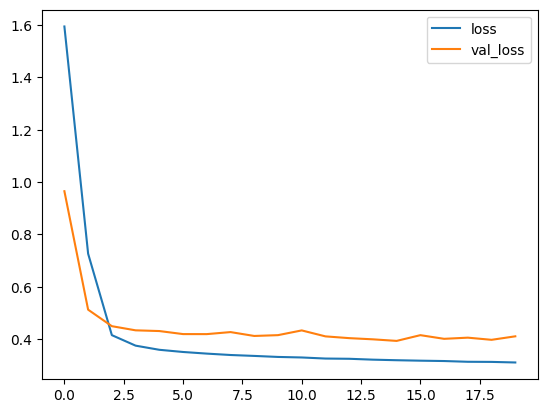

In [88]:
pd.DataFrame(history.history).plot()

In [89]:
model


In [90]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3568


0.35681048035621643

In [91]:
X_test.shape

(5160, 8)

In [92]:
X_new = X_test[0]

In [93]:
X_new

array([-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
        0.56243986,  0.22075674,  0.2580042 ])

In [94]:
X_new.shape

(8,)

In [95]:
X_new.reshape((1,8)).shape

(1, 8)

In [96]:
model.predict(X_new.reshape((1,8)))

1/1 [==============================] - 0s 90ms/step


array([[0.42660666]], dtype=float32)

# Model With Callback

In [105]:
model2 = tf.keras.models.Sequential(LAYERS)

LOSS = 'mse'
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate =pow(10,-3))

model2.compile(loss = LOSS, optimizer  = OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir ='logs')

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]

history = model2.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_valid,y_valid), callbacks = CALLBACKS)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3025 - val_loss: 0.3926
Epoch 2/20
 28/363 [=>............................] - ETA: 1s - loss: 0.3038

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 2s 6ms/step - loss: 0.3011 - val_loss: 0.3950
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3005 - val_loss: 0.3936
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3006 - val_loss: 0.3933
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3004 - val_loss: 0.3930
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3002 - val_loss: 0.3917
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2998 - val_loss: 0.3926
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2998 - val_loss: 0.3942
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2992 - val_loss: 0.3943
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.2991 - val_loss: 0.3911
Epoch 11/20
363/363 [==============================] - 1s 3ms/step - loss: 0.2993 - val_loss: 0.3915
Epoch 12/

In [106]:
%load_ext tensorboard
